<a href="https://colab.research.google.com/github/anjot2807/IT_salaries_prediction_model/blob/main/Salaries_IT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dataset Description**
This dataset contains information about salaries for various job titles in the tech industry, specifically focusing on roles such as Data Scientists and Software Engineers. Each row represents a unique job position with several attributes that provide insights into the employment conditions and compensation.

# **Key Features:**
**work_year**: The year in which the job was held, indicating the temporal context of the salary data.

**experience_level:** The level of experience required for the position, categorized as "MI" (Mid-Level) or "SE" (Senior Level). This feature helps differentiate salaries based on experience.

**employment_type:** Indicates whether the position is full-time (FT), part-time, or contract-based. Employment type can significantly affect salary levels.

**job_title:** The specific title of the job, such as "Data Scientist" or "Software Engineer." Different titles often correlate with varying salary ranges.

**salary**: The nominal salary offered for the position, expressed in the currency specified in the salary_currency column.

**salary_currency:** The currency in which the salary is paid (e.g., GBP for British Pounds, USD for United States Dollars). This feature is essential for understanding and comparing salaries across different regions.

**salary_in_usd:** The equivalent salary converted into US Dollars, allowing for easier comparison of salaries regardless of currency differences.

**employee_residence:** The country where the employee resides, which can influence salary due to local economic conditions.

**remote_ratio:** The percentage of remote work associated with the position. This can impact salary negotiations and expectations.

**company_location:** The geographical location of the company offering the job, which often correlates with varying cost-of-living adjustments in salaries.

**company_size:** Indicates whether the company is small (S), medium (M), or large (L). Company size can influence salary structures and benefits offered to employees.

# **Objective**
For this exercise, I aim to predict salaries using regression models based on the features provided in this dataset. By building a regression model, I can explore how different factors—such as experience level, job title, and company size—affect compensation in the tech industry. This exercise will not only enhance my understanding of regression techniques but also provide valuable insights into salary dynamics within this sector.

Salaries in IT dataset from https://aijobs.net/salaries/





In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import plotly.graph_objects as go
from collections import Counter
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor



In [44]:
df = pd.read_csv('/content/salaries_IT.csv')

In [45]:
display(df.head(10))
print(df.info())
print('Shape of tehe DataFrame (rows/columns):', df.shape)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,63000,GBP,78750,GB,50,GB,L
1,2024,MI,FT,Software Engineer,208000,USD,208000,US,0,US,M
2,2024,MI,FT,Software Engineer,141340,USD,141340,US,0,US,M
3,2024,MI,FT,Software Engineer,239000,USD,239000,US,0,US,M
4,2024,MI,FT,Software Engineer,161000,USD,161000,US,0,US,M
5,2024,MI,FT,Solutions Engineer,174000,USD,174000,US,0,US,M
6,2024,MI,FT,Solutions Engineer,118000,USD,118000,US,0,US,M
7,2024,SE,FT,Data Scientist,281000,USD,281000,US,0,US,M
8,2024,SE,FT,Data Scientist,206000,USD,206000,US,0,US,M
9,2024,SE,FT,Data Scientist,218109,USD,218109,US,0,US,M


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48775 entries, 0 to 48774
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           48775 non-null  int64 
 1   experience_level    48775 non-null  object
 2   employment_type     48775 non-null  object
 3   job_title           48775 non-null  object
 4   salary              48775 non-null  int64 
 5   salary_currency     48775 non-null  object
 6   salary_in_usd       48775 non-null  int64 
 7   employee_residence  48775 non-null  object
 8   remote_ratio        48775 non-null  int64 
 9   company_location    48775 non-null  object
 10  company_size        48775 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.1+ MB
None
Shape of tehe DataFrame (rows/columns): (48775, 11)


In [47]:
df.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [48]:
df.duplicated().sum()

24840

In [50]:
df = df.drop_duplicates()


In [51]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,63000,GBP,78750,GB,50,GB,L
1,2024,MI,FT,Software Engineer,208000,USD,208000,US,0,US,M
2,2024,MI,FT,Software Engineer,141340,USD,141340,US,0,US,M
3,2024,MI,FT,Software Engineer,239000,USD,239000,US,0,US,M
4,2024,MI,FT,Software Engineer,161000,USD,161000,US,0,US,M
5,2024,MI,FT,Solutions Engineer,174000,USD,174000,US,0,US,M
6,2024,MI,FT,Solutions Engineer,118000,USD,118000,US,0,US,M
7,2024,SE,FT,Data Scientist,281000,USD,281000,US,0,US,M
8,2024,SE,FT,Data Scientist,206000,USD,206000,US,0,US,M
9,2024,SE,FT,Data Scientist,218109,USD,218109,US,0,US,M


In [52]:
# Creating a copy of the original DataFrame
df_copy = df.copy()

# Grouping the 'job_title' column and calculating the mean of 'salary_in_usd'
grouped_df = df_copy.groupby('job_title')['salary_in_usd'].mean().reset_index()

# Displaying the result of the grouping
print(grouped_df)

                  job_title  salary_in_usd
0              AI Architect  231500.524590
1         AI Data Scientist   45006.000000
2              AI Developer  163833.229167
3               AI Engineer  164306.852234
4    AI Engineering Manager   91111.000000
..                      ...            ...
240  Statistical Programmer  127970.545455
241            Statistician  118175.000000
242        Systems Engineer  167753.524590
243          Technical Lead  201957.208333
244    Technical Specialist  170450.000000

[245 rows x 2 columns]


In [53]:
# Sorting the grouped DataFrame by 'salary_in_usd' in descending order and selecting the top salary 20 jobs
top_salary_jobs = grouped_df.sort_values(by='salary_in_usd', ascending=False).head(20)

# Displaying the top 20 jobs
print(top_salary_jobs)

                                 job_title  salary_in_usd
22           Analytics Engineering Manager  399880.000000
122                 Data Science Tech Lead  375000.000000
148           Enterprise Account Executive  300500.000000
24                      Applied AI ML Lead  292500.000000
158               Head of Machine Learning  288701.000000
141           Director of Machine Learning  265450.000000
176  Machine Learning Performance Engineer  262500.000000
17                      AWS Data Architect  258000.000000
147                    Engineering Manager  257490.241611
167             ML Infrastructure Engineer  256266.666667
59                    Cloud Data Architect  250000.000000
155                             Head of AI  243200.000000
0                             AI Architect  231500.524590
174        Machine Learning Model Engineer  230000.000000
157                           Head of Data  221869.861702
63                         Cloud Developer  211500.000000
177     Machin

In [54]:
# drawing treemap

def draw_treemap(job_titles):
    # Count the occurrences of each job title
    title_counts = Counter(job_titles)

    # Convert Counter to a dictionary
    title_data = {"Job Title": list(title_counts.keys()), "Frequency": list(title_counts.values())}

    # Create a DataFrame
    df = pd.DataFrame(title_data)

    # Sort DataFrame by Frequency
    df = df.sort_values(by='Frequency', ascending=False)

    # Create treemap
    fig = go.Figure(go.Treemap(
        labels=df['Job Title'],
        parents=[''] * len(df),
        values=df['Frequency']
    ))

    # Update layout
    fig.update_layout(title='Job Titles Treemap')

    # Show treemap
    fig.show()

job_titles = df_copy["job_title"]
draw_treemap(job_titles)

In [55]:
# Get top 15 most frequent job titles
top_jobs = df['job_title'].value_counts().nlargest(15)

# Sum the occurrences of the top 8 job titles
top_jobs_total = top_jobs.sum()

# Total number of rows in the dataset
total_jobs = len(df)

# Calculate the percentage
percentage = (top_jobs_total / total_jobs) * 100

# Print the result
print(f"The top 15 job titles represent {percentage:.2f}% of the total dataset.")

The top 15 job titles represent 73.80% of the total dataset.


In [56]:
top_jobs = df['job_title'].value_counts().nlargest(15)

# Print the top 8 job titles and their occurrences
print("Top 8 most frequent job titles and their occurrences:")
print(top_jobs)

Top 8 most frequent job titles and their occurrences:
job_title
Data Scientist                   3576
Data Engineer                    3226
Data Analyst                     2592
Machine Learning Engineer        1814
Software Engineer                1419
Engineer                          908
Research Scientist                729
Manager                           659
Analytics Engineer                572
Data Architect                    508
Research Engineer                 463
Business Intelligence Analyst     310
Product Manager                   298
Applied Scientist                 296
Associate                         293
Name: count, dtype: int64


In [57]:
# Grouping jobs

# List of AI and Data Science careers
ai_data_jobs = [
    'data scientist', 'machine learning engineer', 'data analyst', 'research scientist',
    'research engineer', 'applied scientist', 'business intelligence analyst', 'data architect', 'principal data scientist'
]

# List of engineering professions
engineering_jobs = [
    'data engineer', 'software engineer', 'engineer', 'analytics engineer'
]

# List of managerial professions
manager_jobs = [
    'manager', 'product manager', 'associate']

In [58]:
# Unification of competition titles (lowercase, stripping)
df_copy['job_title'] = df['job_title'].str.strip().str.lower()

In [59]:
# Function for assigning professions to groups
def categorize_job(title):
    if title in ai_data_jobs:
        return 'AI/Data Science'
    elif title in engineering_jobs:
        return 'Engineer'
    elif title in manager_jobs:
        return 'Manager'
    else:
        return 'Other'

# Creating a new 'job_category' column that assigns job titles to appropriate groups
df_copy['job_category'] = df_copy['job_title'].apply(categorize_job)


print(df_copy[['job_title', 'job_category']])

                      job_title     job_category
0                data scientist  AI/Data Science
1             software engineer         Engineer
2             software engineer         Engineer
3             software engineer         Engineer
4             software engineer         Engineer
...                         ...              ...
48770            data scientist  AI/Data Science
48771  principal data scientist  AI/Data Science
48772            data scientist  AI/Data Science
48773     business data analyst            Other
48774            data scientist  AI/Data Science

[23935 rows x 2 columns]


In [60]:
df_copy.describe()


,work_year,salary,salary_in_usd,remote_ratio
count,23935.000000,2.393500e+04,23935.000000,23935.000000
mean,2023.678212,1.644725e+05,153816.267182,26.695216
std,0.634368,2.926677e+05,76015.900976,43.923667
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.000000e+05,100000.000000,0.000000
50%,2024.000000,1.430000e+05,142500.000000,0.000000
75%,2024.000000,1.960000e+05,195000.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [61]:
df_copy.head(20)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2024,MI,FT,data scientist,63000,GBP,78750,GB,50,GB,L,AI/Data Science
1,2024,MI,FT,software engineer,208000,USD,208000,US,0,US,M,Engineer
2,2024,MI,FT,software engineer,141340,USD,141340,US,0,US,M,Engineer
3,2024,MI,FT,software engineer,239000,USD,239000,US,0,US,M,Engineer
4,2024,MI,FT,software engineer,161000,USD,161000,US,0,US,M,Engineer
5,2024,MI,FT,solutions engineer,174000,USD,174000,US,0,US,M,Other
6,2024,MI,FT,solutions engineer,118000,USD,118000,US,0,US,M,Other
7,2024,SE,FT,data scientist,281000,USD,281000,US,0,US,M,AI/Data Science
8,2024,SE,FT,data scientist,206000,USD,206000,US,0,US,M,AI/Data Science
9,2024,SE,FT,data scientist,218109,USD,218109,US,0,US,M,AI/Data Science


In [62]:
salary_exp = df_copy.groupby('experience_level')['salary_in_usd'].mean().reset_index()

salary_exp.head(10)

,experience_level,salary_in_usd
0,EN,101512.784946
1,EX,203663.054233
2,MI,139212.263931
3,SE,169856.769585


<ipython-input-63-b183b881dbad>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




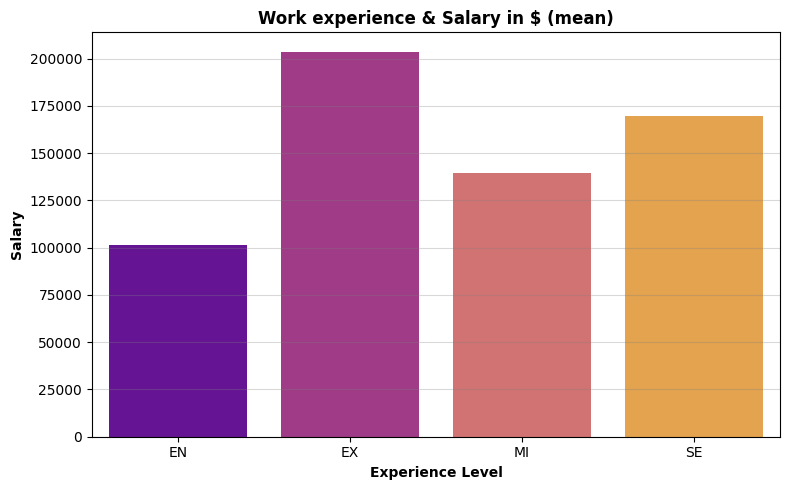

In [63]:
plt.figure(figsize = (8,5))
sns.barplot(x = salary_exp['experience_level'], y = salary_exp['salary_in_usd'], palette = 'plasma')

plt.title('Work experience & Salary in $ (mean)', fontweight = 'bold')
plt.xlabel('Experience Level', fontweight='bold')
plt.ylabel('Salary', fontweight='bold')

plt.grid(True, axis = 'y', color = 'grey', alpha = 0.3)

plt.tight_layout()
plt.show()

In [64]:
print(df_copy.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'job_category'],
      dtype='object')


In [65]:
#  Remove columns (not needed for the model)
df_copy = df_copy.drop(columns=['salary', 'job_title', 'salary_currency'])

In [24]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23935 entries, 0 to 48774
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           23935 non-null  int64 
 1   experience_level    23935 non-null  object
 2   employment_type     23935 non-null  object
 3   salary_in_usd       23935 non-null  int64 
 4   employee_residence  23935 non-null  object
 5   remote_ratio        23935 non-null  int64 
 6   company_location    23935 non-null  object
 7   company_size        23935 non-null  object
 8   job_category        23935 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.8+ MB


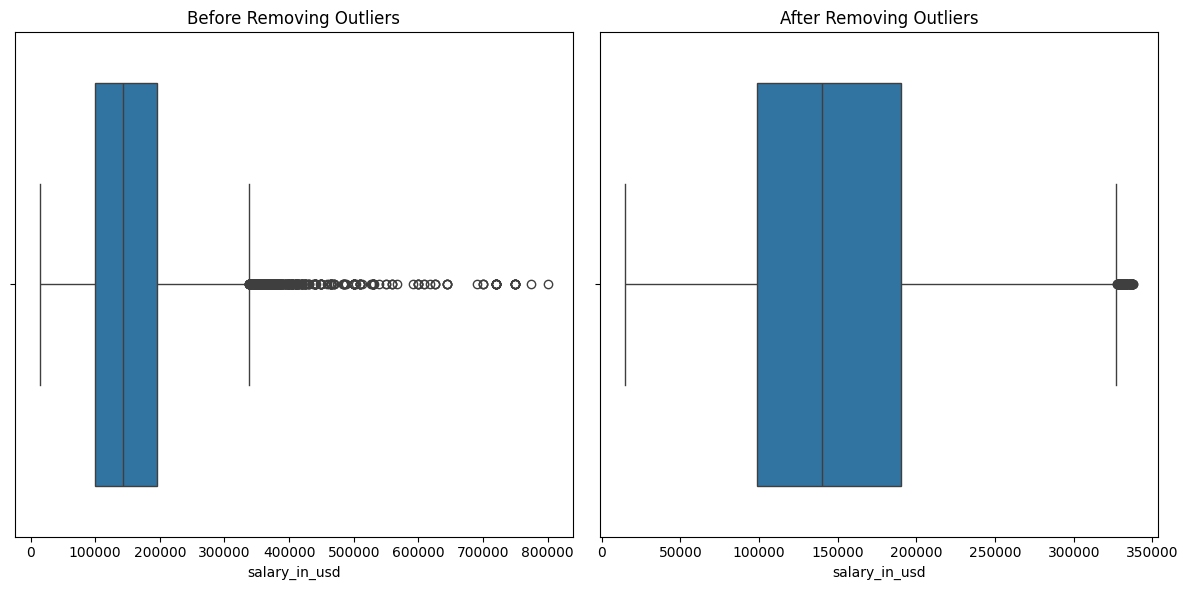

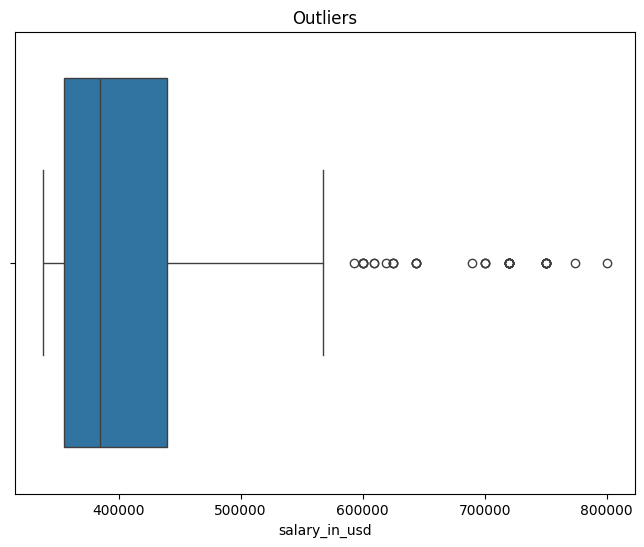

In [66]:
# Function to remove outliers
def remove_outliers(df_copy, column):
    # Calculate Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Extract outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Filter the data, removing outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered, outliers

# Remove the outliers and store them separately
df_cleaned, outliers = remove_outliers(df_copy, 'salary_in_usd')

# Plot the data before and after removing outliers
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)  # create 2 columns of plots
sns.boxplot(data=df_copy, x='salary_in_usd')
plt.title('Before Removing Outliers')

# Data after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned, x='salary_in_usd')
plt.title('After Removing Outliers')

plt.tight_layout()
plt.show()

# Plotting the outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=outliers, x='salary_in_usd')
plt.title('Outliers')
plt.show()

In [67]:
X = df_copy.drop(columns=['salary_in_usd'])
y = df_copy['salary_in_usd']

In [68]:
categorical_features = ['experience_level', 'employment_type', 'employee_residence',
                        'company_location', 'company_size', 'job_category']
numerical_features = ['remote_ratio']


In [28]:
# Function to create a pipeline for a given model with normalization (MinMaxScaler)
def create_pipeline(model):
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
            ('num', MinMaxScaler(), numerical_features)  # Using MinMaxScaler for normalization
        ]
    )

    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

In [71]:
# Create pipelines for each regression model
linear_pipeline = create_pipeline(LinearRegression())
ridge_pipeline = create_pipeline(Ridge())
lasso_pipeline = create_pipeline(Lasso())
elasticnet_pipeline = create_pipeline(ElasticNet())
decision_tree_pipeline = create_pipeline(DecisionTreeRegressor())
xgboost_pipeline = create_pipeline(XGBRegressor(use_label_encoder=False))
gradient_boosting_pipeline = create_pipeline(GradientBoostingRegressor())

In [70]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=42)


In [72]:
# Function to train and evaluate the model with additional MAPE metric
def evaluate_model(pipeline, model_name):
    # Train the model
    pipeline.fit(X_train,y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)

    # Avoid division by zero for MAPE calculation
    nonzero_y_test = np.where(y_test != 0, y_test, np.finfo(float).eps)
    mape = np.mean(np.abs((y_test - y_pred) / nonzero_y_test)) * 100

    print(f'{model_name}:')
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    print(f'MAPE: {mape}%')
    print('-' * 40)

In [73]:
# Function to train and evaluate the model with additional MAPE metric and histogram
def evaluate_model(pipeline, model_name):
    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Avoid division by zero for MAPE calculation
    nonzero_y_test = np.where(y_test != 0, y_test, np.finfo(float).eps)
    mape = np.mean(np.abs((y_test - y_pred) / nonzero_y_test)) * 100

    # Print metrics
    print(f'{model_name}:')
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    print(f'MAPE: {mape}%')
    print('-' * 40)

    # Plot histogram
    plt.figure(figsize=(10, 6))

    # Plot real vs predicted
    plt.hist(y_test, bins=50, alpha=0.5, label='Real values')
    plt.hist(y_pred, bins=50, alpha=0.5, label='Predicted values')

    plt.title(f'{model_name} - Real vs Predicted values')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')

    # Show the plot
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros



Linear Regression:
MSE: 4921225751.782941
MAE: 51112.15488837943
MAPE: 40.919900694529666%
----------------------------------------


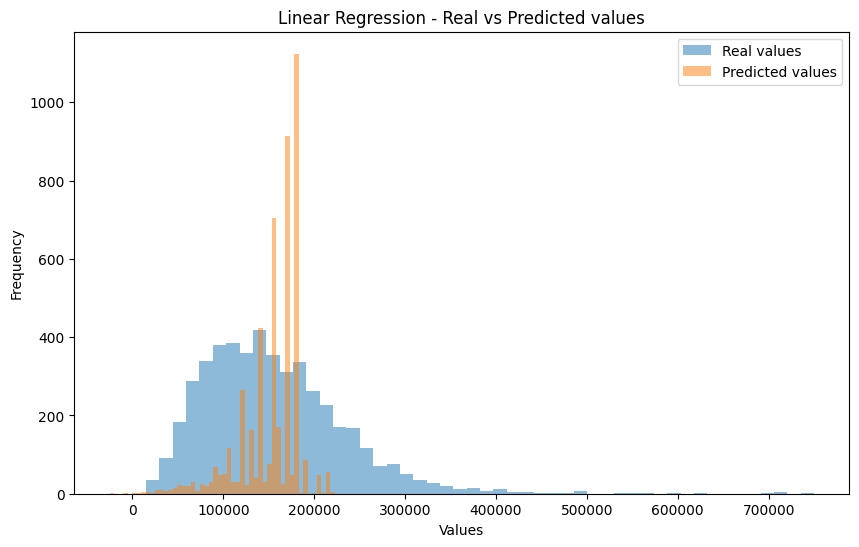

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros



Ridge Regression:
MSE: 4920352268.061316
MAE: 51085.46984474375
MAPE: 40.896466244535056%
----------------------------------------


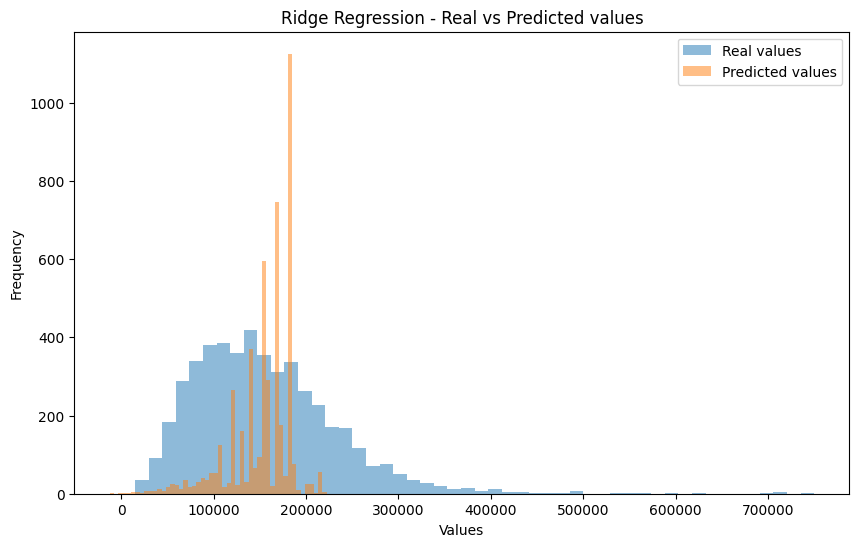

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros



Lasso Regression:
MSE: 4919201700.260553
MAE: 51064.265629478556
MAPE: 40.80827680938741%
----------------------------------------


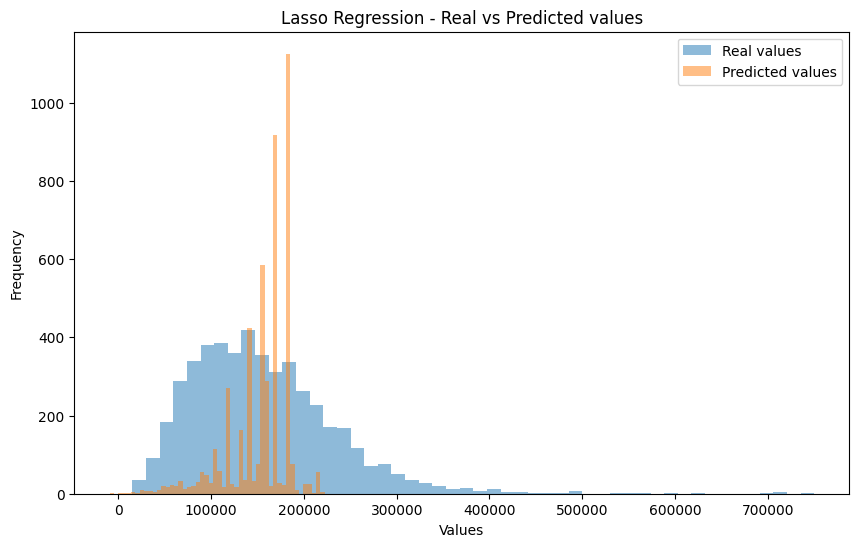

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros



ElasticNet Regression:
MSE: 5584269974.7570095
MAE: 56406.28863781327
MAPE: 50.96905727724247%
----------------------------------------


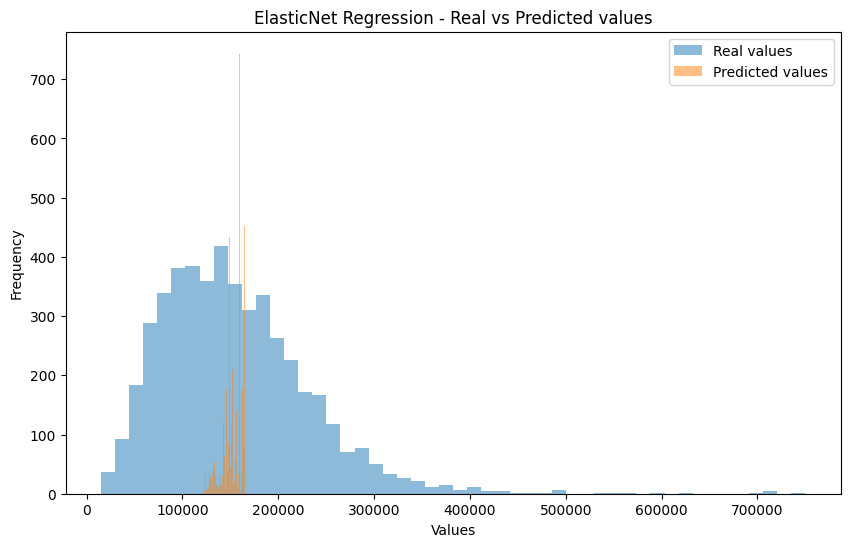

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros



Decision Tree Regressor:
MSE: 4957297108.396732
MAE: 50972.07361729754
MAPE: 40.27112213211594%
----------------------------------------


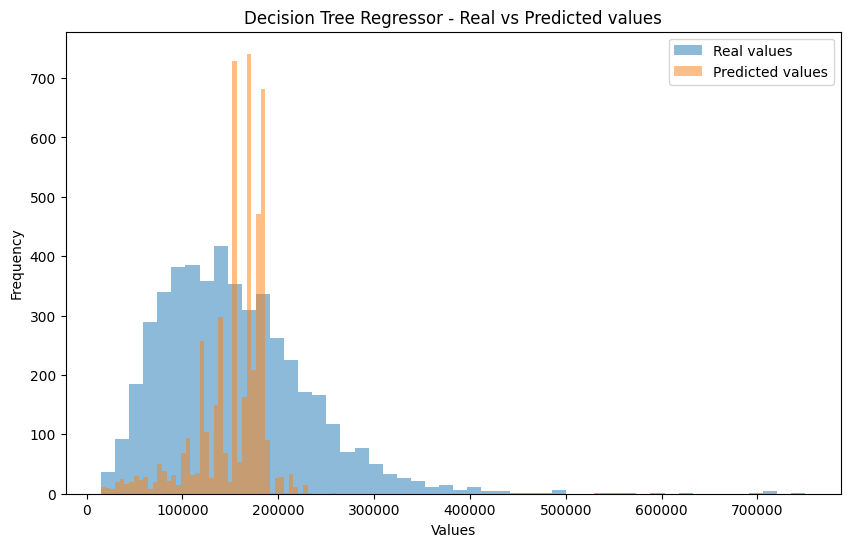

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[09:02:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros



XGBoost Regressor:
MSE: 4918697698.170179
MAE: 50794.401100555544
MAPE: 40.47345968619997%
----------------------------------------


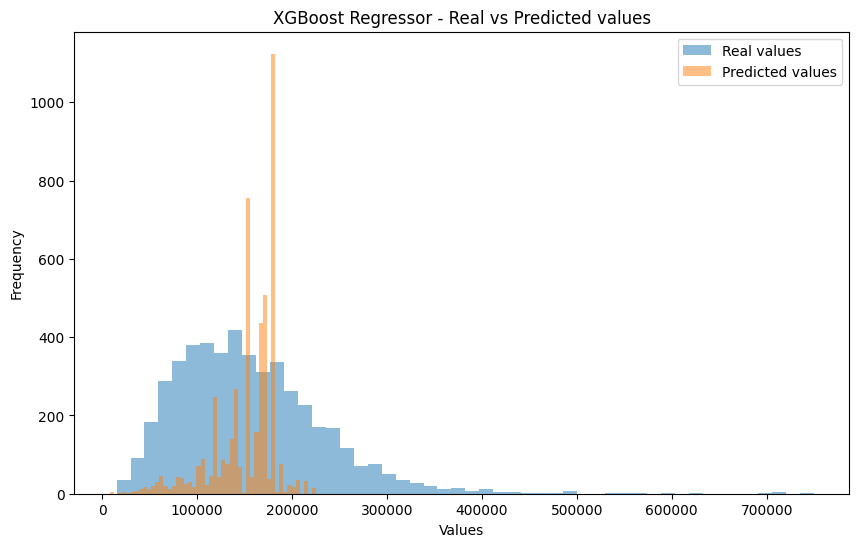

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros



Gradient Boosting Regressor:
MSE: 4934303856.350751
MAE: 51145.08046618904
MAPE: 41.267791524769756%
----------------------------------------


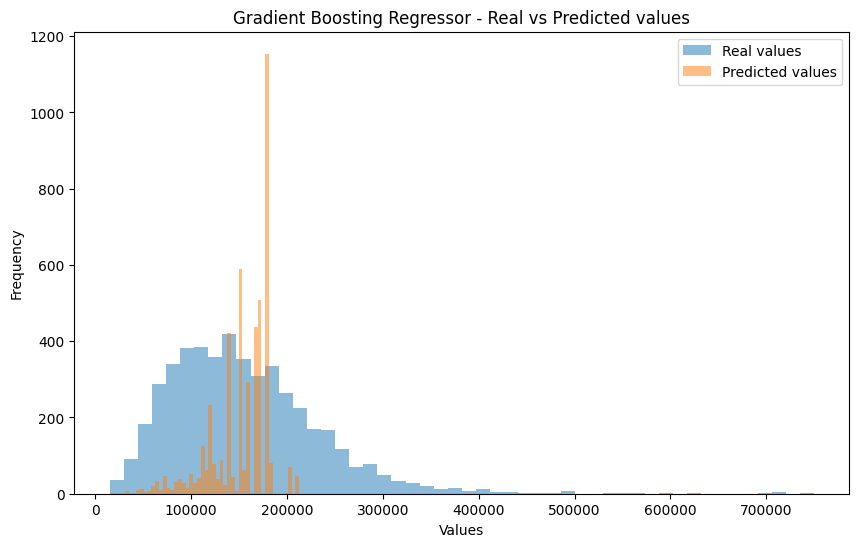

In [74]:
# Call the function for each model to evaluate and print results
evaluate_model(linear_pipeline, "Linear Regression")
evaluate_model(ridge_pipeline, "Ridge Regression")
evaluate_model(lasso_pipeline, "Lasso Regression")
evaluate_model(elasticnet_pipeline, "ElasticNet Regression")
evaluate_model(decision_tree_pipeline, "Decision Tree Regressor")
evaluate_model(xgboost_pipeline, "XGBoost Regressor")
evaluate_model(gradient_boosting_pipeline,"Gradient Boosting Regressor")

In [75]:
# Function to draw plots for actual and predicted values
def plot_predictions(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))

    # Create a scatter plot comparing actual and predicted values
    sns.scatterplot(x=y_test, y=y_pred, label='Predicted', color='blue')

    # Add a line showing perfect fit (where predicted = actual)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')

    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'{model_name}: Actual vs Predicted Salary')
    plt.legend()
    plt.grid(True)

    # Set limits for the y-axis
    plt.ylim(0, 400000)  # Set y-axis limit to 400,000

    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros



Linear Regression:
MSE: 4921225751.782941
MAE: 51112.15488837943
MAPE: 40.919900694529666%
----------------------------------------


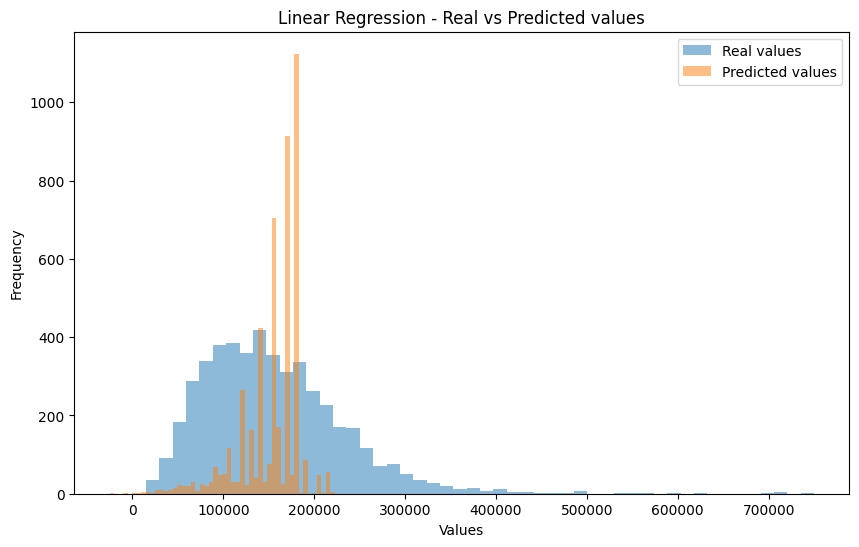

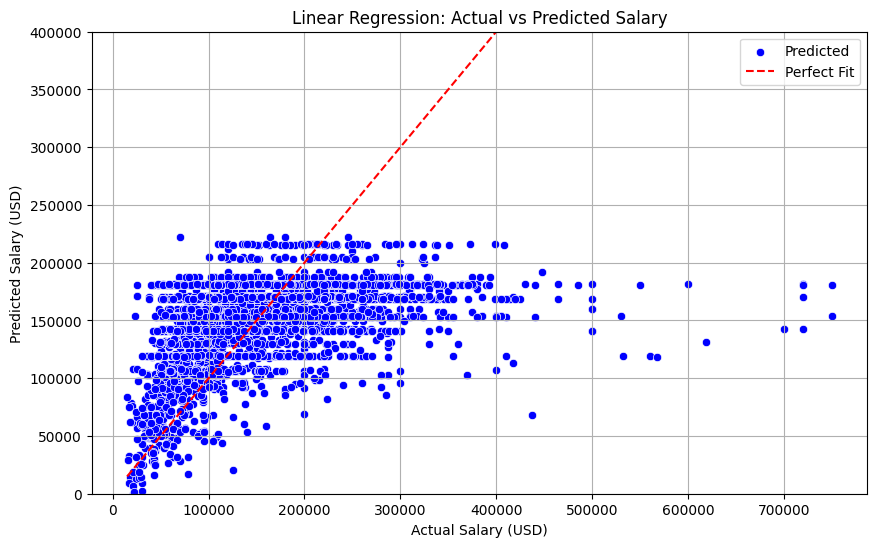

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros



Ridge Regression:
MSE: 4920352268.061316
MAE: 51085.46984474375
MAPE: 40.896466244535056%
----------------------------------------


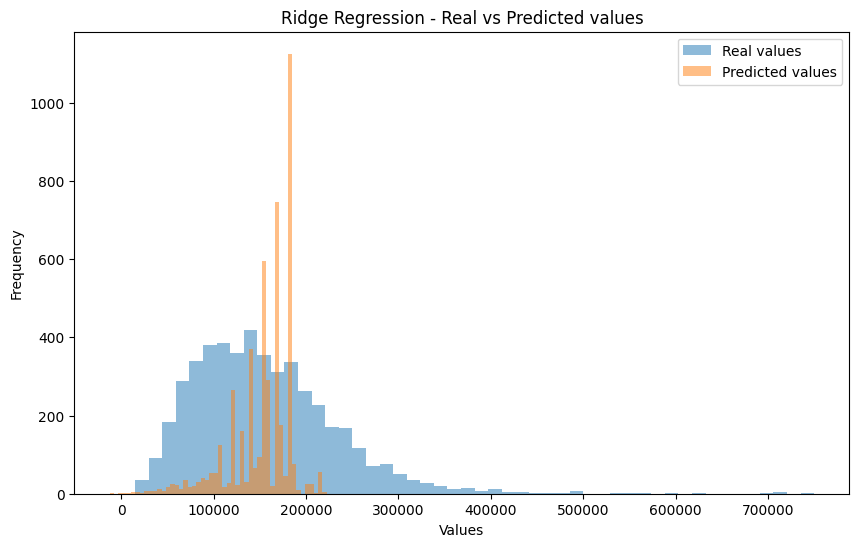

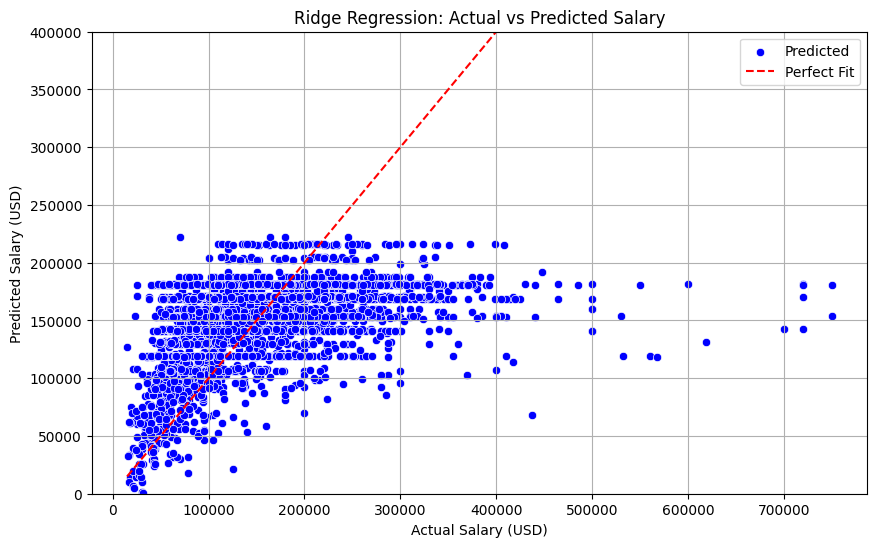

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros



Lasso Regression:
MSE: 4919201700.260553
MAE: 51064.265629478556
MAPE: 40.80827680938741%
----------------------------------------


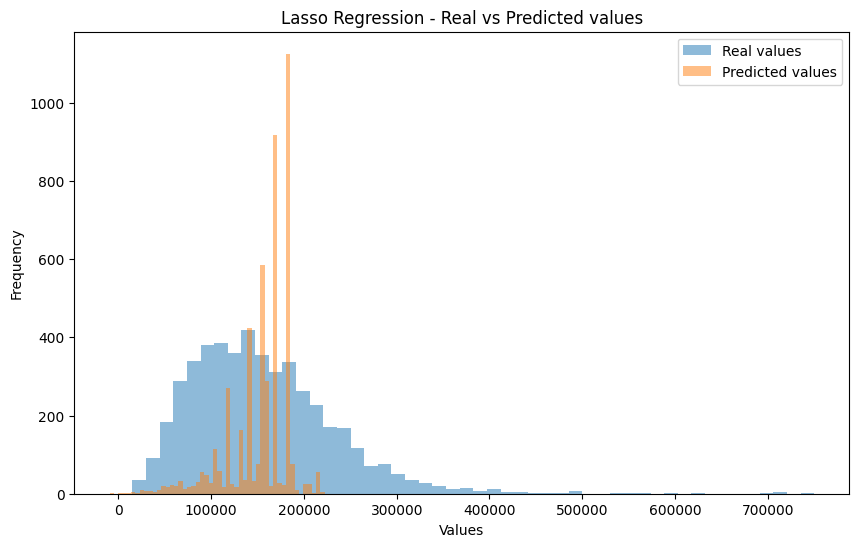

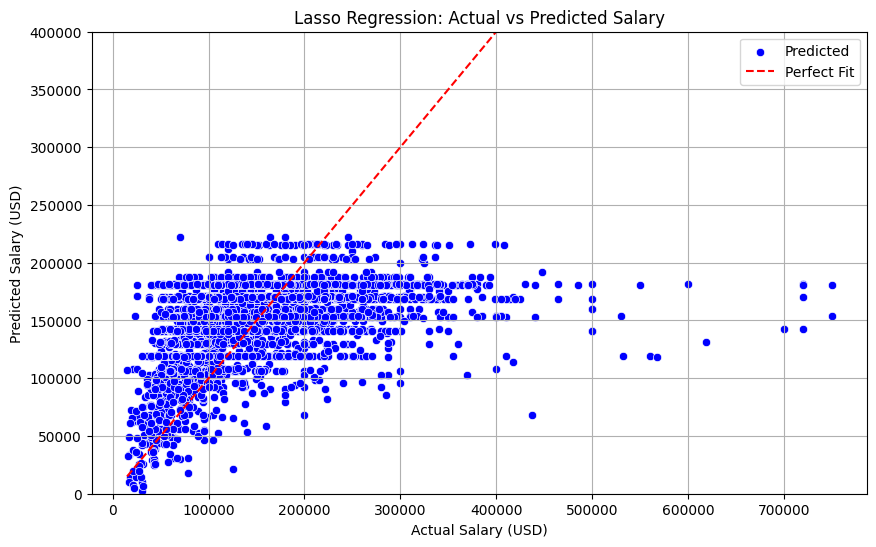

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros



ElasticNet Regression:
MSE: 5584269974.7570095
MAE: 56406.28863781327
MAPE: 50.96905727724247%
----------------------------------------


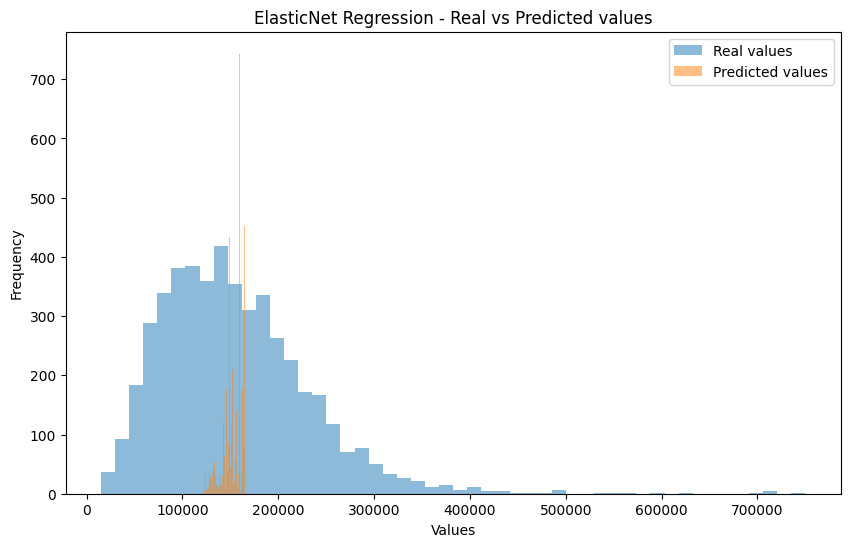

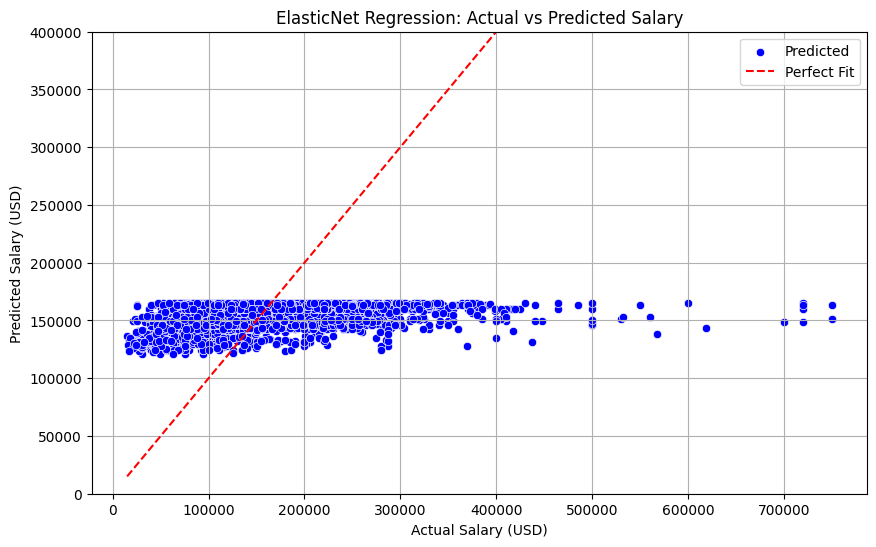

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros



Decision Tree Regressor:
MSE: 4955438386.952547
MAE: 50945.6446952169
MAPE: 40.25277555846507%
----------------------------------------


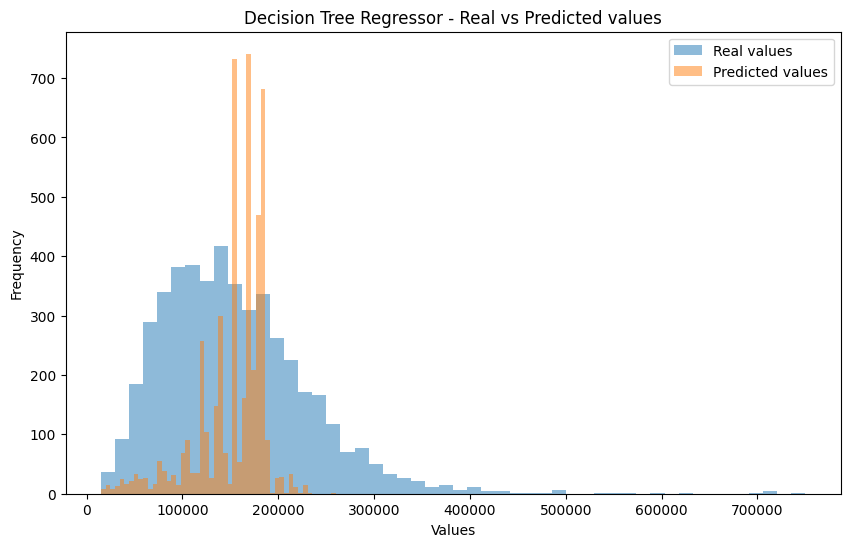

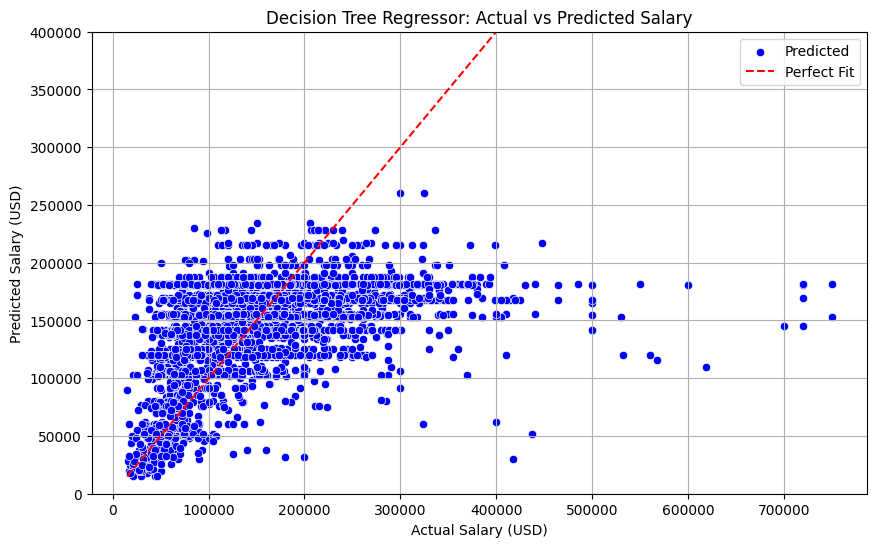

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[09:02:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[09:02:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros



XGBoost Regressor:
MSE: 4918697698.170179
MAE: 50794.401100555544
MAPE: 40.47345968619997%
----------------------------------------


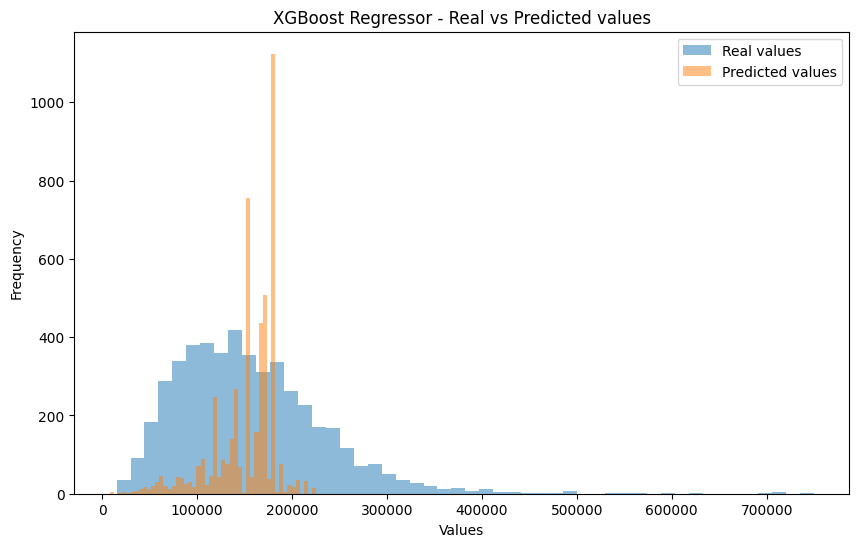

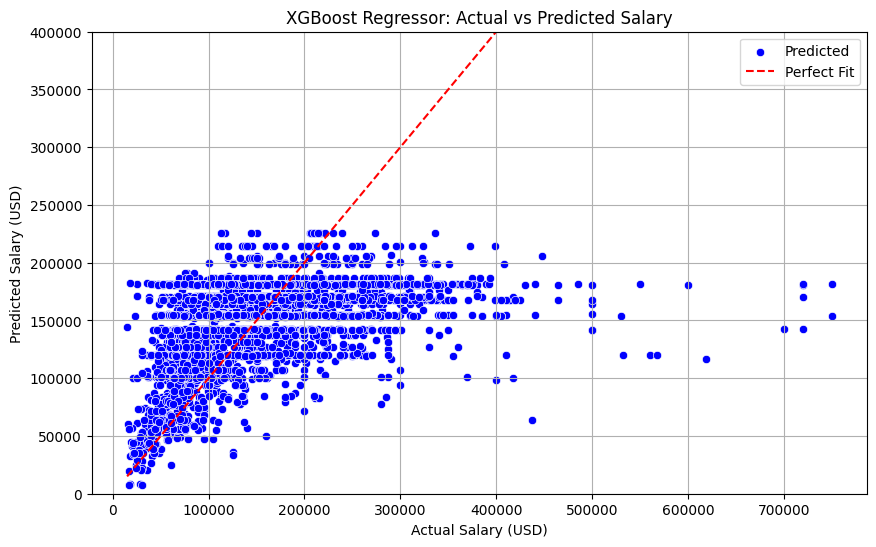

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros



Gradient Boosting Regressor:
MSE: 4934394753.951795
MAE: 51145.75459234566
MAPE: 41.27175697274982%
----------------------------------------


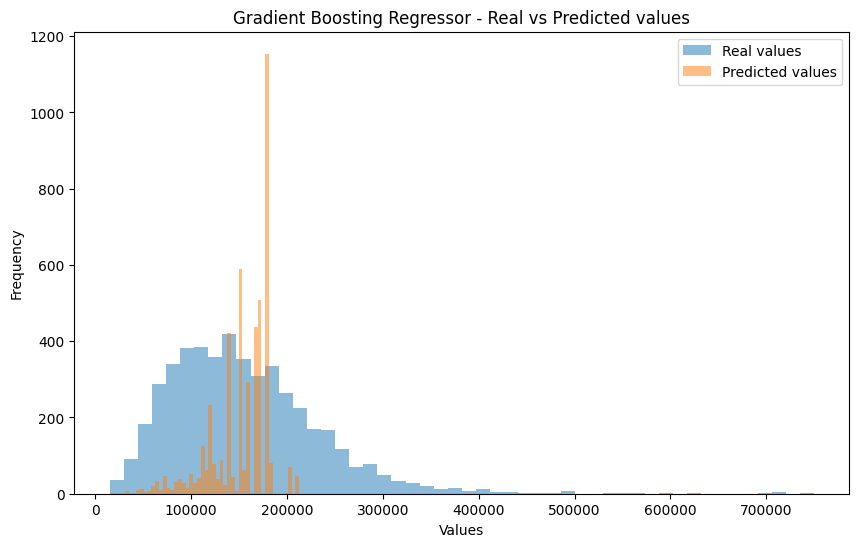

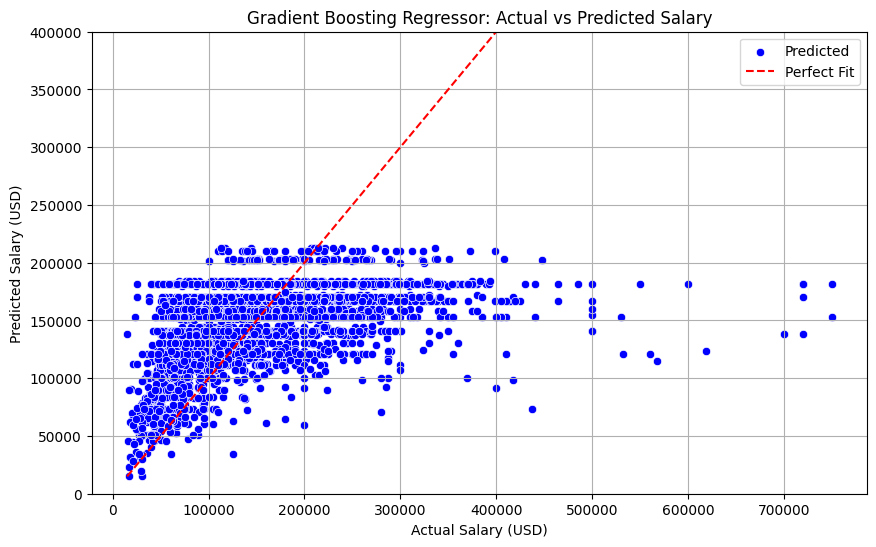

In [76]:
# Function to evaluate models and plot predictions
def evaluate_and_plot(pipeline, model_name):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Call previously defined evaluate_model function
    evaluate_model(pipeline, model_name)

    # Draw the plot for the model
    plot_predictions(y_test, y_pred, model_name)

# Call the function for each model to create plots
evaluate_and_plot(linear_pipeline, "Linear Regression")
evaluate_and_plot(ridge_pipeline, "Ridge Regression")
evaluate_and_plot(lasso_pipeline, "Lasso Regression")
evaluate_and_plot(elasticnet_pipeline, "ElasticNet Regression")
evaluate_and_plot(decision_tree_pipeline, "Decision Tree Regressor")
evaluate_and_plot(xgboost_pipeline, "XGBoost Regressor")
evaluate_and_plot(gradient_boosting_pipeline, "Gradient Boosting Regressor")

## **Conclusion:**

Despite applying various techniques and efforts to improve the model, it’s important to recognize that not all datasets yield strong predictive results. In this particular case, predicting salaries in the IT industry has proven to be quite challenging. The variability in salaries is influenced by multiple factors beyond the data at hand, such as the specific company, geographic location, and cost of living in different regions. These external variables introduce significant complexity that a regression-based model may struggle to capture accurately.

As a result, the predictive power of the model in this scenario is limited, and it doesn't provide reliable enough forecasts to be used as a basis for salary predictions. This demonstrates that while regression models can be useful in many contexts, they are not always the best choice when it comes to predicting complex and highly variable outcomes like IT salaries.